# ECDFs

In my two SciPy 2018 co-taught tutorials, I made the case that ECDFs provide richer information compared to histograms. My main points were:

1. We can more easily identify central tendency measures, in particular, the median, compared to a histogram.
1. We can much more easily identify other percentile values, compared to a histogram.
1. We become less susceptible to outliers arising from binning issues.
1. It is more difficult to hide multiple modes.
1. We can easily identify repeat values.

To illustrate, let's take a look at the following plots.

Text(0.5,1,'ecdf')

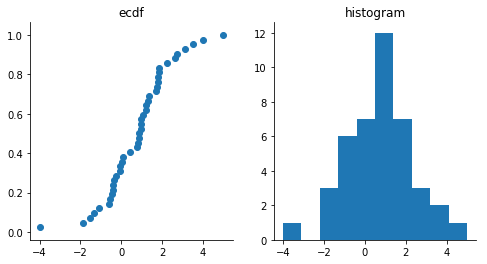

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a mixture of two normal distributions, but with
# very few data points.
np.random.seed(3)
mx1 = np.random.normal(loc=0, scale=1, size=20)
mx2 = np.random.normal(loc=2, scale=1, size=20)
mx = np.concatenate([mx1, mx2, [5], [-4]])  # one outlier

def ecdf(data):
    x, y = np.sort(data), np.arange(1, len(data)+1) / len(data)
    return x, y

fig = plt.figure(figsize=(8, 4))
ax_ecdf = fig.add_subplot(121)
ax_hist = fig.add_subplot(122)
ax_hist.set_title('histogram')

ax_hist.hist(mx)

x, y = ecdf(mx)
ax_ecdf.scatter(x, y)
ax_ecdf.set_title('ecdf')

Let's compare the ECDF and the histogram for this data.

**Is the central tendency measure easily discoverable?** We might say that there's some peak at just below the x-axis at just above zero, but is that the mode, median or mean? And what is its exact value? On the other hand, at least the median is easily discoverable on the ECDF: Draw a horizontal line from 0.5 on the y-axis until it crosses a data point, and then drop a line down to the x-axis to get the median value.

**Are percentiles easily discoverable?** It's much clearer that the answer is "yes" for the ECDF, and "no" for the histogram.

**What is the value of the potential outlier?** Difficult to tell on the histogram: it could be anywhere from 4 to 5 (high outlier) and maybe -3 to -4 on the low outlier. On the other hand, just drop a line down from the suspected outliers to the x-axis to read off their values.

**Is this a mixture distribution or is this a single Normal distribution?** If you looked at the histogram, you might be tempted to think that the data are normally distributed with mean 0.5 and standard deviation about 2. However, if you look at the ECDF, it's clear that there are multiple modes, as shown by two or three sigmoidal-like curves. This should give us pause to see if there's a mixture distribution at play here.

**Are there repeat values?** You can't tell in a histogram. However, it's evidently clear on the ECDF scatterplot that there's no repeat values -- they would show up on the plot as vertical stacks of dots. (Repeat-values might be important when working with, say, a zero- or X-inflated distribution.)

## Summary

I hope this post showed you why ECDFs contain richer information than histograms. They're taught less commonly than histograms, so people will have a harder time interpreting them at first glance. However, a bit of guidance and orientation will bring out the rich information on the ECDFs.

## Credits

I credit Justin Bois (Caltech) for teaching me about ECDFs, and Hugo Bowne-Anderson (DataCamp) for reinforcing the idea.